# LAB 5 - KISIM 2
# ALPEREN KARATAŞ - 1801022022

# Soru 1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook

original_img=cv.imread("Fig1016(a)(building_original).pgm",0)  # goruntu okunuyor
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX) # goruntu normalize ediliyor

sobelx=cv.Sobel(out,-1,0,1,ksize=3) # x yonundeki sobel aliniyor
sobely=cv.Sobel(out,-1,1,0,ksize=3) # y yonundeki sobel aliniyor
 
sobel=abs(sobelx)+abs(sobely) # son sobel sonucu elde ediliyor

T=np.amax(sobel)*0.33 # %33'luk threshold seviyesi filtenin maks degerine uygulaniyor
print(T)

sobel[sobel >= T] = 255  # threshold seviyesinden yuksek olana beyaz renk
sobel[sobel < T] = 0 # threshold seviyesinden yuksek olana siyah renk

plt.figure()
plt.imshow(sobel,cmap="gray")
plt.title("10.20(a)") # sobel filtresi uygulanmis goruntu
plt.colorbar()

smoothed_img=cv.blur(out,(5,5)) # goruntu blurlaniyor

# buradan sonraki islemler yukaridaki islemlerin aynisi olup blurlanmis goruntuye uygulanmistir

sobelx=cv.Sobel(smoothed_img,-1,0,1,ksize=3)
sobely=cv.Sobel(smoothed_img,-1,1,0,ksize=3)

sobel=abs(sobelx)+abs(sobely)

T=np.amax(sobel)*0.33
print(T)

sobel[sobel >= T] = 255
sobel[sobel < T] = 0

plt.figure()
plt.imshow(sobel,cmap="gray") 
plt.title("10.20(b)")
plt.colorbar()

1.247529411764706


<IPython.core.display.Javascript object>

0.6021270588235295


<IPython.core.display.Javascript object>

In [23]:
## import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook

original_img=cv.imread("Fig1016(a)(building_original).pgm",0)
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)

filter=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
dst=cv.filter2D(out,-1,filter)

abssobelx=abs(dst)

filter=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
dsty=cv.filter2D(out,-1,filter)

abssobely=abs(dsty)

sobel=abssobelx+abssobely

plt.figure()
plt.imshow(sobel,cmap="gray")
plt.title("10.16(d)")
plt.colorbar()

<IPython.core.display.Javascript object>

Otsu thresholding seviyesi: 0.6276041666666667


<IPython.core.display.Javascript object>


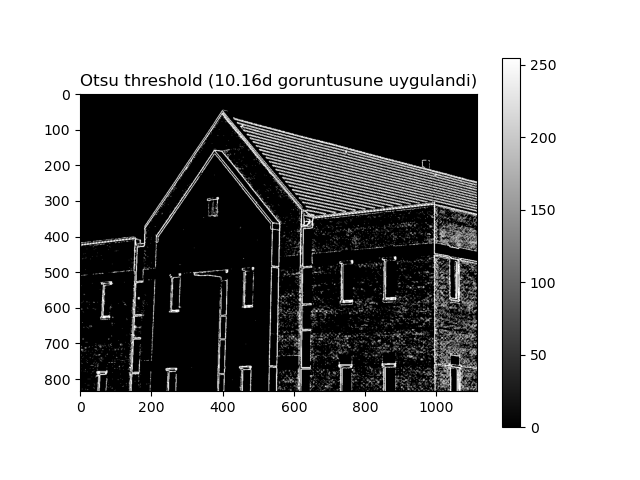

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook

original_img=cv.imread("Fig1016(a)(building_original).pgm",0)
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)

I = 256  # maksimum piksel degeri (dongude kullanilacak deger oldugu icin bir fazlasi alindi)

hist, k_points = np.histogram(sobel, bins=I)  # goruntunun histogrami elde ediliyor

mid_point_k = (k_points[:-1] + k_points[1:]) / 2  # histogramdaki orta noktalar bulunuyor

# q1 ve q2 agirliklari icin I boyutuna sahip diziler olusturuldu
q1 = np.zeros(I)
q2 = np.zeros(I)

# q1 agirligi hesaplandi
for i in range(0,I):
    q1[i] = hist[i] + q1[i-1]

hist_inv = hist[::-1] # q2 agirligini hesaplamak icin histogram ters donduruldu

# q2 agirligi hesaplandi. 
for i in range(0,I):
    q2[i] = hist_inv[i] + q2[i-1]

q2 = q2[::-1] # ters dondurulen hist sebebiyle q2 agirligi ters cevrilerek normale donduruldu

# nu1 ve nu2 ortalamalari icin I boyutuna sahip diziler olusturuldu
nu1 = np.zeros(I)
nu2 = np.zeros(I)

# nu1 degerleri elde edildi
for i in range(0,I):
    nu1[i] = hist[i] * mid_point_k[i]

# nu1 ortalamasi elde edildi
nu1 = nu1 / q1
 
# nu1 ortalamasi elde edildi (for dongusu yerine numpy kutuphanesinin kumulatif toplami saglayan cumsum metodundan faydalanildi)
nu2 = (np.cumsum((hist * mid_point_k)[::-1]) / q2[::-1])[::-1]

# sigma b kare degeri hesaplandi (hesaplanan ifadenin maksimumu bulundu)
sigma_b_square_max_val = np.argmax(q1[:-1] * q2[1:] * (nu1[:-1] - nu2[1:]) ** 2)

# threshold degeri bulundu
threshold = mid_point_k[:-1][sigma_b_square_max_val]
print("Otsu thresholding seviyesi:", threshold)

out_img = sobel

# cikis goruntusu pikselleri belirlenen threhold üzerinde ise 255, altinda ise 0 degeri atandi
out_img[out_img >= threshold] = 255 
out_img[out_img <  threshold] = 0 

plt.figure()
plt.imshow(out_img,cmap="gray")
plt.title("Otsu threshold (10.16d goruntusune uygulandi)")
plt.colorbar()

# Soru 2

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook

original_img=cv.imread("Fig1050(a)(sine_shaded_text_image).pgm",0)
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)

I = 256  # maksimum piksel degeri (dongude kullanilacak deger oldugu icin bir fazlasi alindi)

hist, k_points = np.histogram(out, bins=I)  # goruntunun histogrami elde ediliyor

mid_point_k = (k_points[:-1] + k_points[1:]) / 2  # histogramdaki noktalarin ortasi bulunuyor

# q1 ve q2 agirliklari icin I boyutuna sahip diziler olusturuldu
q1 = np.zeros(I)
q2 = np.zeros(I)

# q1 agirligi hesaplandi
for i in range(0,I):
    q1[i] = hist[i] + q1[i-1]

hist_inv = hist[::-1] # q2 agirligini hesaplamak icin histogram ters donduruldu

# q2 agirligi hesaplandi. 
for i in range(0,I):
    q2[i] = hist_inv[i] + q2[i-1]

q2 = q2[::-1] # ters dondurulen hist sebebiyle q2 agirligi ters cevrilerek normale donduruldu

# nu1 ve nu2 ortalamalari icin I boyutuna sahip diziler olusturuldu
nu1 = np.zeros(I)
nu2 = np.zeros(I)

# nu1 degerleri elde edildi
for i in range(0,I):
    nu1[i] = hist[i] * mid_point_k[i]

# nu1 ortalamasi elde edildi
nu1 = nu1 / q1
 
# nu1 ortalamasi elde edildi (for dongusu yerine numpy kutuphanesinin kumulatif toplami saglayan cumsum metodundan faydalanildi)
nu2 = (np.cumsum((hist * mid_point_k)[::-1]) / q2[::-1])[::-1]

# sigma b kare degeri hesaplandi (hesaplanan ifadenin maksimumu bulundu)
sigma_b_square_max_val = np.argmax(q1[:-1] * q2[1:] * (nu1[:-1] - nu2[1:]) ** 2)

# threshold degeri bulundu
threshold = mid_point_k[:-1][sigma_b_square_max_val]
print("Otsu thresholding seviyesi:", threshold)

# cikis goruntusu pikselleri belirlenen threhold üzerinde ise 255, altinda ise 0 degeri atandi
out[out >= threshold] = 255 
out[out <  threshold] = 0 

plt.figure()
plt.imshow(out,cmap="gray")
plt.title("Otsu threshold (10.50b)")
plt.colorbar()

Otsu thresholding seviyesi: 0.705078125


<IPython.core.display.Javascript object>

[0.00206286]


<IPython.core.display.Javascript object>


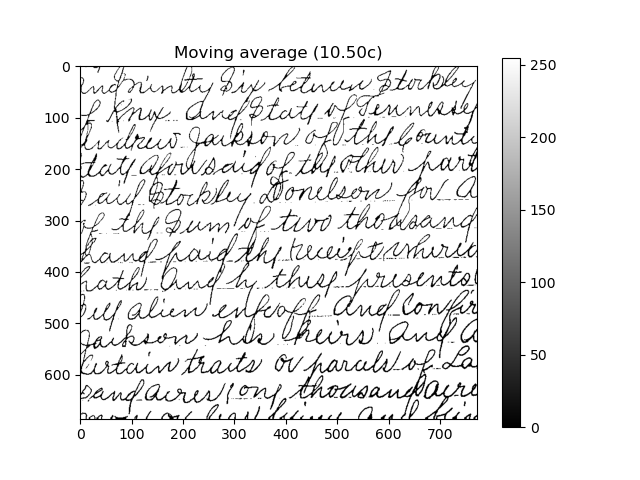

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook

original_img=cv.imread("Fig1050(a)(sine_shaded_text_image).pgm",0)
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)

# moving average fonksiyonu
def moving_average(img, imgsize) :
    cumsummed = np.cumsum(img, dtype=float)   # goruntunun piksel degerleri kumulatif olarak toplandi
    cumsummed[imgsize:] = cumsummed[imgsize:] - cumsummed[:-imgsize] # kumulatif toplamin ilk degerinden son degeri cikarildi
    return cumsummed[imgsize - 1:] / imgsize

sizeofImage = out.size # goruntunun boyutu
threshold = moving_average(out,sizeofImage) / 255  # fonksiyondan donen threshold olceklendi
print(threshold)

moving_averaged_img = out

# cikis goruntusu pikselleri belirlenen threhold üzerinde ise 255, altinda ise 0 degeri atandi
moving_averaged_img[moving_averaged_img >= threshold] = 255 
moving_averaged_img[moving_averaged_img <  threshold] = 0 

plt.figure()
plt.imshow(out,cmap="gray")
plt.title("Moving average (10.50c)")
plt.colorbar()